# Conventional Deep CNN Models Evaluation
input files: training history of each model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
from sources import util

%matplotlib inline

#### List of CNN Models to Analyze:
**Models:** VGG16, DenseNet169, InceptionV3, MobileNetV2, NASNetMobile, ResNet152, Xception <br />
**Base:** pretrained imagenet models <br />
**PCA:** introduce PCA on top layers <br />

In [3]:
# model types:
types = ['_Base', '_PCA']

# CNN Models:
models = ['DenseNet169', 'InceptionV3', 'MobileNetV2', 'NASNetMobile', 'ResNet152', 'VGG16', 'Xception']

# All Models being Evaluated Grouped by Structures
all_models = []
for model in models:
    all_models.append([])
    for t in types:
        all_models[-1].append(model + t)

## Training Process
The training history of each model was stored in the train_history csv files.

Here, we are comparing the changing trend of several metrics of various deep CNN models during the training process.

### Load Training History

In [4]:
def load_training_history(type_name, model_name, histories = {}):
    
    '''
    type_name: whether the model is the base model or the post PCA model
    model_name: one of the CNN models
    histories: dictionary stored training history data
    
    This function is used to load all training histories from various csv files.
    '''
    
    name = model_name + type_name
    file = name + '-train_history.csv'
    file_path = os.path.join('Saved_files', 'history', file)
    df = pd.read_csv(file_path, index_col = 0)
    histories[name] = df
    print(f'{name} file loaded')
    return histories

In [5]:
# load training histories for all models
histories = {}
for model in models:
    for t in types:
        histories = load_training_history(t, model, histories)

DenseNet169_Base file loaded
DenseNet169_PCA file loaded
InceptionV3_Base file loaded
InceptionV3_PCA file loaded
MobileNetV2_Base file loaded
MobileNetV2_PCA file loaded
NASNetMobile_Base file loaded
NASNetMobile_PCA file loaded
ResNet152_Base file loaded
ResNet152_PCA file loaded
VGG16_Base file loaded
VGG16_PCA file loaded
Xception_Base file loaded
Xception_PCA file loaded


#### Visualize Model Performance

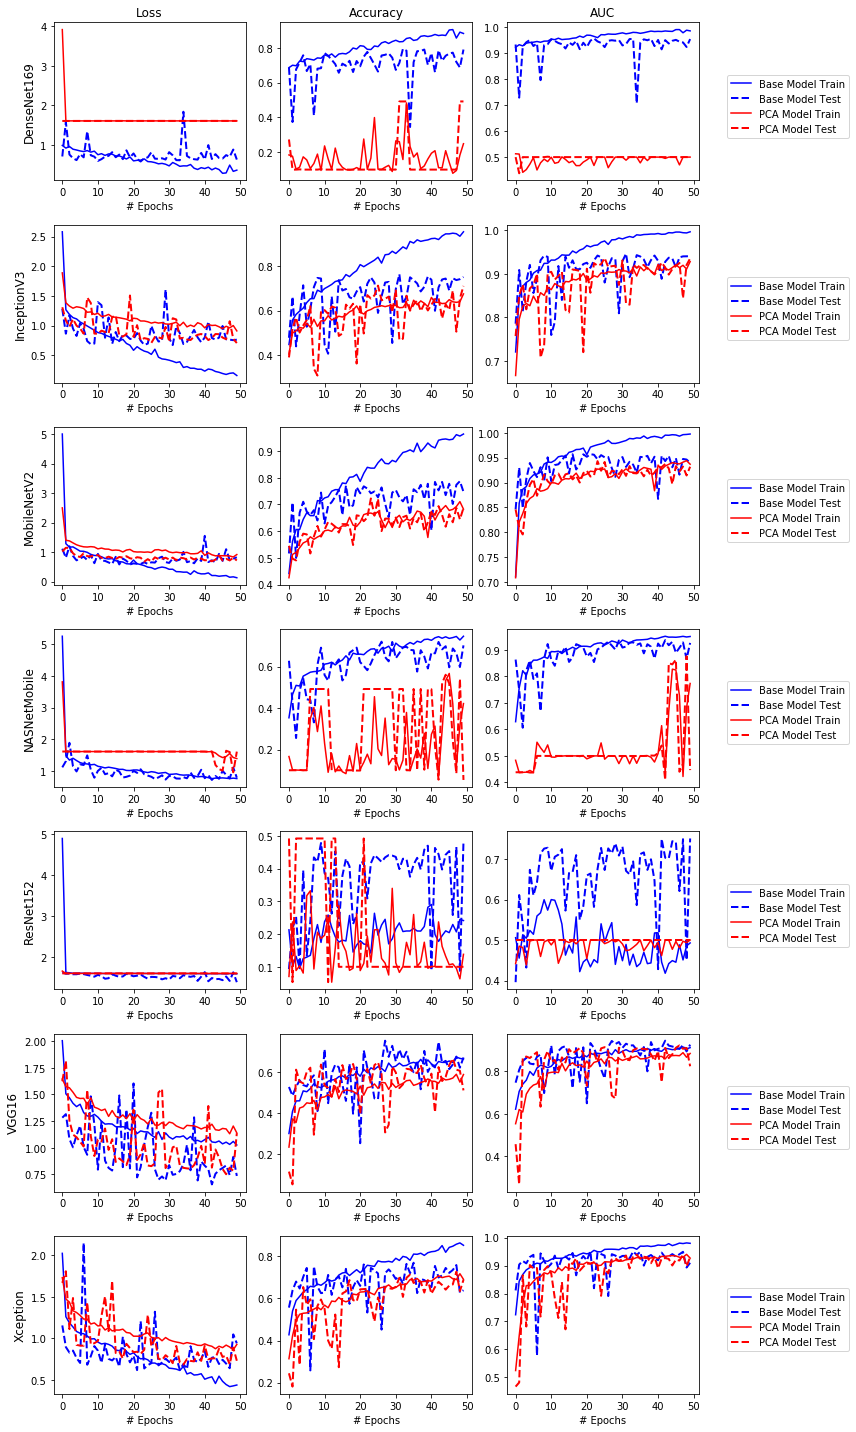

In [6]:
fig, axe = plt.subplots(7,3,figsize=(12,20))   
data_cols = [['loss', 'val_loss'], ['accuracy', 'val_accuracy'], ['auc', 'val_auc']]
rows = ['Loss', 'Accuracy', 'AUC']

for ax, model in zip(axe[:,0], models):
    ax.set_ylabel(model, rotation=90, fontsize=12)
            
for ax, row in zip(axe[0], rows):
    ax.set_title(row, fontsize=12)
    
for i in range(len(all_models)):
    model_name = models[i]
    cols = all_models[i]
    df1 = histories[cols[0]]
    df2 = histories[cols[1]]
        
    for j in range(3):
        data1_train = np.array(df1[data_cols[j][0]])
        data1_test = np.array(df1[data_cols[j][1]])
        data2_train = np.array(df2[data_cols[j][0]])
        data2_test = np.array(df2[data_cols[j][1]])
        axe[i, j].plot(data1_train, linestyle = '-', color = 'blue')
        axe[i, j].plot(data1_test, linestyle = '--', color = 'blue', linewidth=2)
        axe[i, j].plot(data2_train, linestyle = '-', color = 'red')
        axe[i, j].plot(data2_test, linestyle = '--', color = 'red', linewidth=2)
        axe[i, j].set_xlabel('# Epochs')
        
    axe[i,j].legend(['Base Model Train', 'Base Model Test', 'PCA Model Train', 'PCA Model Test'], bbox_to_anchor=(1.12, 0.7))
    
fig.tight_layout()
fig.savefig('report_images/deep_cnn_train_history.png', dpi=200)

**DenseNet169:** Base model performs better than the post PCA model regarding all three metrics.
<br/> **NASNetMobile:** Base model performs better than the post PCA model regarding all three metrics. It seems that the post PCA is not converged.
<br/> **ResNet152:** Base model performs better than the post PCA model regarding all three metrics. Both models have unstable performance.
<br/> **All other deep models:**  Model performance has no significant difference between the base model and the post PCA model.

In [7]:
def get_AUC(cols, auc = [], val_auc = []):
    for name in cols:
        df = histories[name]
        auc.append(df.loc[49, 'auc'])
        val_auc.append(df.loc[49, 'val_auc'])
    return auc, val_auc

In [8]:
# prepare info of AUC on training set and test set
auc, val_auc = [], []
for cols in all_models:
    auc, val_auc = get_AUC(cols, auc, val_auc)

In [9]:
time_file = os.path.join('Saved_files', 'training_times.csv')
df_time = pd.read_csv(time_file)
#train_time = np.array(df_time['training time'][4:])/50

In [10]:
sum_file = os.path.join('Saved_files', 'model_summary.csv')
df_sum = pd.read_csv(sum_file)
#para_num = np.array(df_sum['trainable para'])

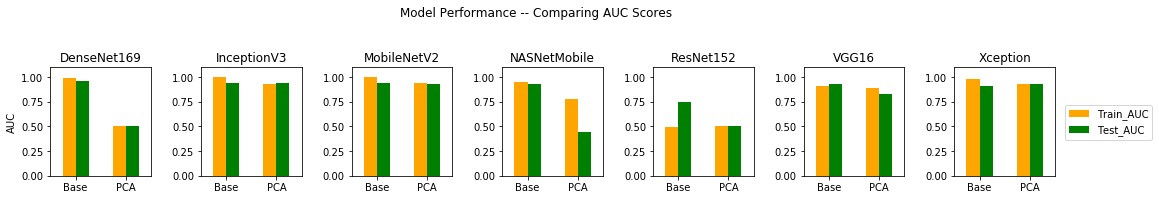

In [13]:
fig, axe = plt.subplots(1,7,figsize=(18,2))
plt.suptitle('Model Performance -- Comparing AUC Scores', fontsize=12, y = 1.3)

for ax, col in zip(axe, models):
    ax.set_title(col, fontsize=12)
xticks = ['Base', 'PCA']

for i in range(len(all_models)):
    model_name = models[i]
    cols = all_models[i]
    auc, val_auc = get_AUC(cols, [], [])
    x = np.arange(2)
    width = 0.26
    axe[i].bar(x - width/2, auc, width, label='Train_AUC', color='orange')
    axe[i].bar(x + width/2, val_auc, width, label='Test_AUC', color='green')
    
    axe[i].set_xticks(x)
    axe[i].set_xticklabels(xticks)
    axe[i].set_ylim(0.0, 1.1)
    axe[i].set_xlim(-0.5, 1.5)
axe[0].set_ylabel('AUC')
axe[i].legend(bbox_to_anchor=(1.05, 0.7))
plt.subplots_adjust(wspace=0.5)

fig.savefig('report_images/deep_cnn_model_metrics.png', dpi=200)

PCA does not apply to **ResNet style networks with shortcut connections** or to **layers with grouping** (filters do not act on common inputs channels).

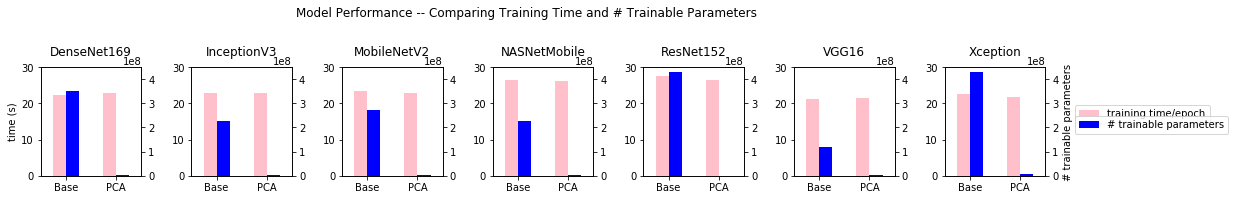

In [12]:
fig, axe = plt.subplots(1,7,figsize=(18,2))
plt.suptitle('Model Performance -- Comparing Training Time and # Trainable Parameters', fontsize=12, y = 1.3)

for ax, col in zip(axe, models):
    ax.set_title(col, fontsize=12, y = 1.05)
xticks = ['Base', 'PCA']

for i in range(len(all_models)):
    model_name = models[i]
    cols = all_models[i]
    tt1 = df_time.loc[df_time['model'] == cols[0], 'training time'].values/50
    tt2 = df_time.loc[df_time['model'] == cols[1], 'training time'].values/50
    train_time = np.concatenate((tt1, tt2))
    pn1 = df_sum.loc[df_sum['model'] == cols[0], 'trainable para'].values
    pn2 = df_sum.loc[df_sum['model'] == cols[1], 'trainable para'].values
    para_num = np.concatenate((pn1, pn2))
    
    x = np.arange(2)
    width = 0.26
    
    tax = axe[i].twinx()
    axe[i].bar(x - width/2, train_time, width, label='training time/epoch', color='pink')
    tax.bar(x + width/2, para_num, width, label='# trainable parameters', color='blue')
    
    axe[i].set_xticks(x)
    axe[i].set_xticklabels(xticks)
    axe[i].set_ylim(0, 30)
    tax.set_ylim(0.0, 4.5e8)
    axe[i].set_xlim(-0.5, 1.5)

axe[0].set_ylabel('time (s)')
tax.set_ylabel('# trainable parameters')
axe[i].legend(bbox_to_anchor=(1.25, 0.7))
tax.legend(bbox_to_anchor=(1.25, 0.6))
plt.subplots_adjust(wspace=0.5)

fig.savefig('report_images/deep_cnn_traintime_paranum.png', dpi=200)

**Overall:**
<br/> The training time of each post_PCA model is slightly shorter than its corresponding base model;
<br/> The number of paraneters of each post_PCA model is significantly fewer than its corresponding base model.